# Introduction  

Cardiovascular disease is a leading cause of mortality worldwide, making early intervention and treatment crucial. With the advancement of data science, machine learning techniques have been increasingly applied to assist in disease prediction and diagnosis. In this study, we compare **K-Nearest Neighbors (KNN)** and **Logistic Regression** for heart disease prediction to evaluate their effectiveness in clinical decision-making.  

We conduct our analysis using the **Cleveland Heart Disease Dataset**, which contains **14 clinical attributes** and **303 patient records**, among which **6 records have missing values**. By exploring this dataset, we aim to identify key clinical features that influence heart disease and assess the predictive performance of the selected models.  

Dataset link: [Cleveland Heart Disease Dataset](https://archive.ics.uci.edu/dataset/45/heart+disease)  



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Data Loading and Preprocessing
## Reading Dataset
14 Attributes Used for Analysis

1. **Age** - Patient's age in years  
2. **Sex** - Patient's gender  
3. **Chest Pain Type (cp)** - Type of chest pain experienced  
4. **Resting Blood Pressure (trestbps)** - Blood pressure at rest (mm Hg)  
5. **Cholesterol (chol)** - Serum cholesterol level (mg/dl)  
6. **Fasting Blood Sugar (fbs)** - Blood sugar levels while fasting (> 120 mg/dl)  
7. **Resting ECG (restecg)** - Resting electrocardiographic results  
8. **Maximum Heart Rate (thalach)** - Maximum heart rate achieved  
9. **Exercise Induced Angina (exang)** - Angina induced by exercise  
10. **ST Depression (oldpeak)** - ST depression induced by exercise relative to rest  
11. **Slope** - Slope of the peak exercise ST segment  
12. **Number of Major Vessels (ca)** - Number of major vessels colored by fluoroscopy  
13. **Thalassemia (thal)** - Thalassemia test result  
14. **Diagnosis (num)** - Target variable (presence of heart disease)  

In [2]:
data_dir='../HeartDisease/heart_disease/processed.cleveland.data'
col_names=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
print(len(col_names))
df1=pd.read_csv(data_dir, header=None,names=col_names)
df1 #with missing data

14


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


## Missing Value

In [3]:
df1=df1.replace('?',np.NaN)

In [4]:
print('Data Info:')
print(df1.info())
print()
print("Missing values:")
print(df1.isnull().sum())

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    object 
 12  thal      301 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB
None

Missing values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal  

In [5]:
missing_percentage=(df1.isnull().sum()/len(df1)*100)
# missing_percentage=missing_percentage.sort_values(ascending=False)
print(missing_percentage)

age         0.000000
sex         0.000000
cp          0.000000
trestbps    0.000000
chol        0.000000
fbs         0.000000
restecg     0.000000
thalach     0.000000
exang       0.000000
oldpeak     0.000000
slope       0.000000
ca          1.320132
thal        0.660066
num         0.000000
dtype: float64


### drop null
Since the proportion of missing values is relatively small, using `dropna` is a reasonable approach for handling them.

In [6]:
df1=df1.dropna()

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    object 
 12  thal      297 non-null    object 
 13  num       297 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 34.8+ KB


## Data type conversion
Ensuring that the variables `ca` and `thal` are represented as floating-point numbers, which may be necessary for numerical computations and machine learning model compatibility.

In [8]:
df1['ca']=df1['ca'].astype(float)
df1['thal']=df1['thal'].astype(float)


## Convert multi-class (different kinds of heart disease) target to binary

In [9]:
df1['num']=df1['num'].replace(2,1)
df1['num']=df1['num'].replace(3,1)
df1['num']=df1['num'].replace(4,1)

In [10]:
df1.describe().round(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00
mean,54.54,0.68,3.16,131.69,247.35,0.14,1.00,149.60,0.33,1.06,1.60,0.68,4.73,0.46
std,9.05,0.47,0.96,17.76,52.00,0.35,0.99,22.94,0.47,1.17,0.62,0.94,1.94,0.50
min,29.00,0.00,1.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,1.00,0.00,3.00,0.00
25%,48.00,0.00,3.00,120.00,211.00,0.00,0.00,133.00,0.00,0.00,1.00,0.00,3.00,0.00
50%,56.00,1.00,3.00,130.00,243.00,0.00,1.00,153.00,0.00,0.80,2.00,0.00,3.00,0.00
75%,61.00,1.00,4.00,140.00,276.00,0.00,2.00,166.00,1.00,1.60,2.00,1.00,7.00,1.00
max,77.00,1.00,4.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,3.00,3.00,7.00,1.00


## Data Understanding and Normalization

In [11]:
#summarize key features of the dataset.
# df1.describe().round(2)

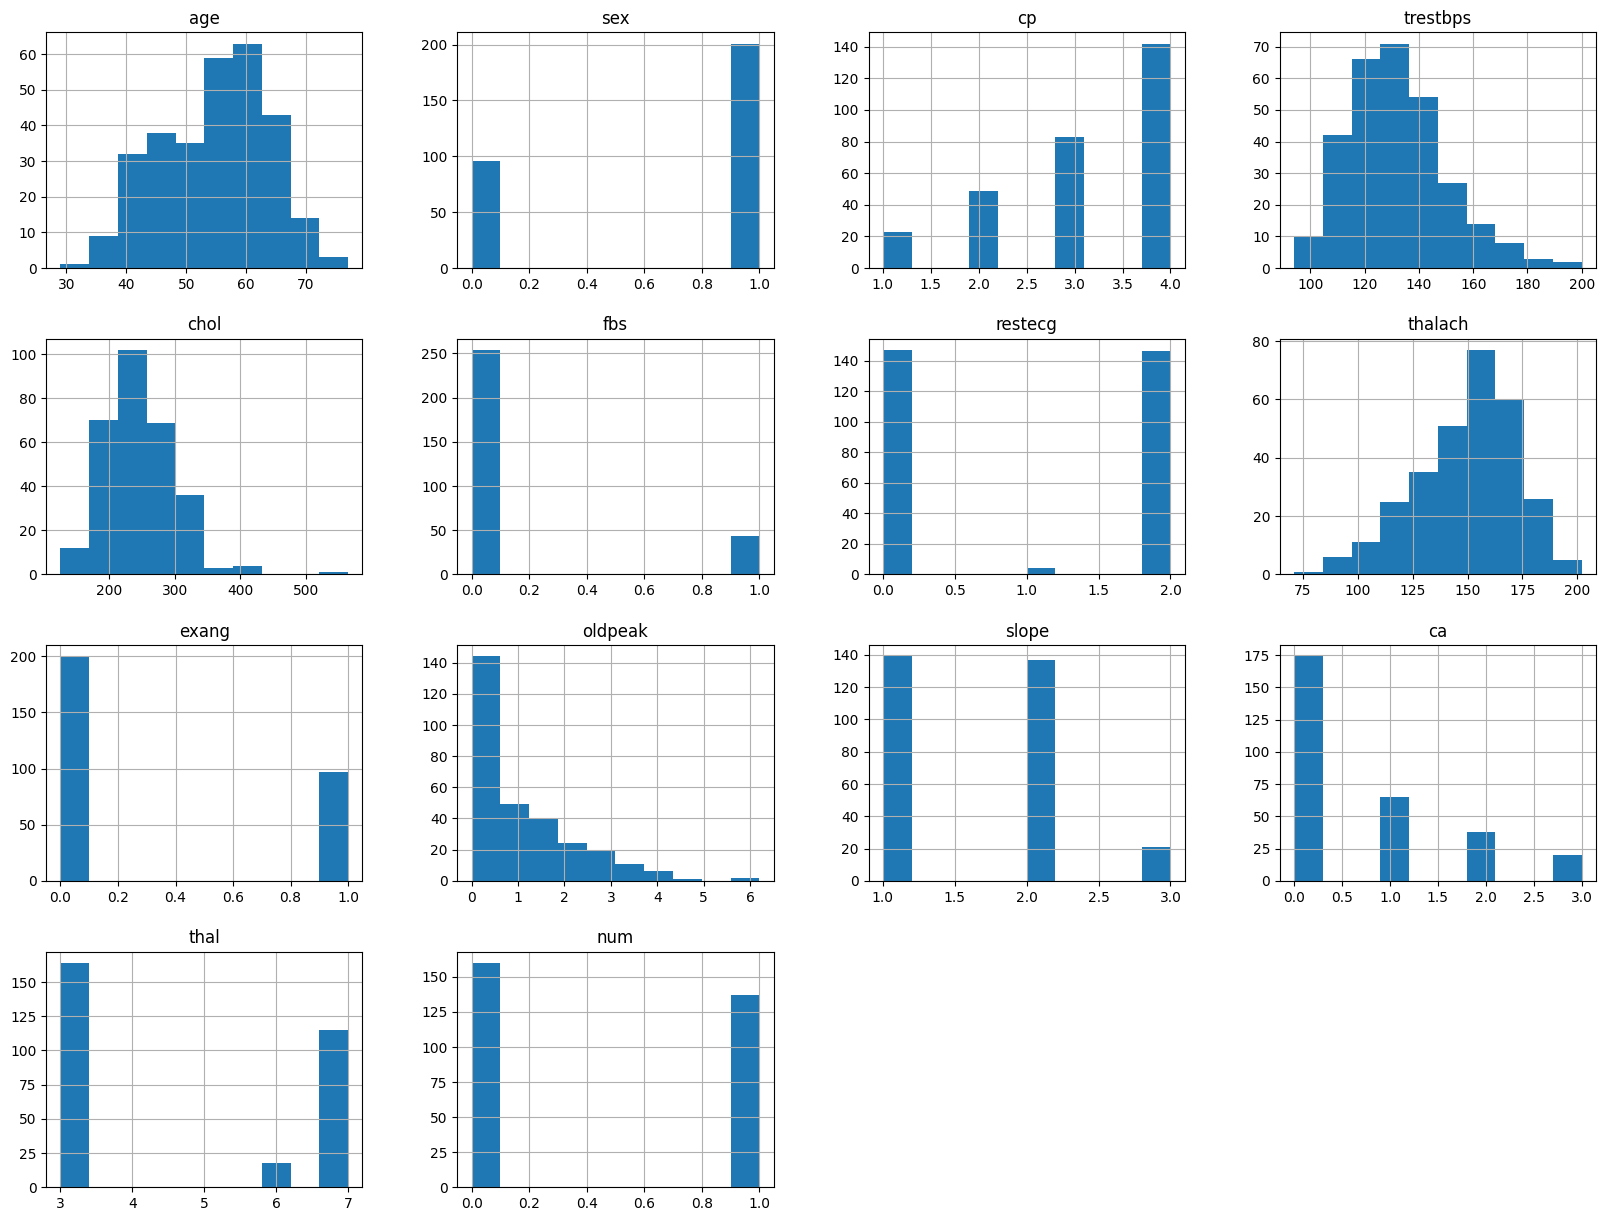

In [12]:
# Histograms are plotted to visualize attribute distributions 
# and detect potential outliers.
df1.hist(figsize=(20,15),histtype='barstacked')
plt.show()

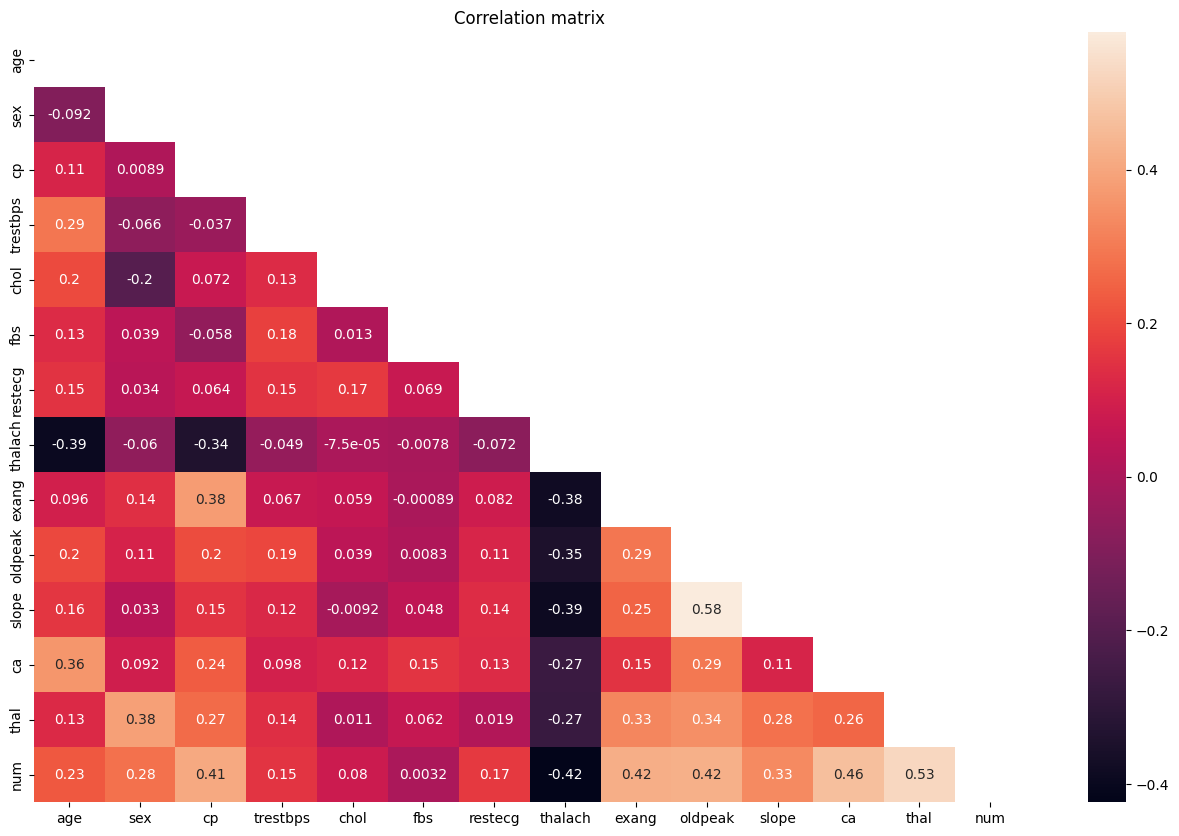

In [13]:
# To further explore feature relationships, we compute the correlation 
# matrix and visualize it using a heatmap. This helps identify potential 
# multicollinearity, providing insights for feature selection and model development.
cols=df1.columns
plt.figure(figsize=(16,10),dpi=100)
corr=df1.corr()

mask=np.zeros_like(corr,dtype=bool)
mask[np.triu_indices_from(mask)]=True

sns.heatmap(corr,mask=mask,annot=True)


plt.title('Correlation matrix')
plt.show()

## Data Normalization
To ensure that all features contribute equally to the model, we apply **z-score normalization** using `StandardScaler()`. Each feature (excluding the target variable `num`) is transformed to have zero mean and unit variance:  

In [14]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
for column in df1.columns:
    if column !='num':
        df1[column]=Scaler.fit_transform(df1[column].values.reshape(-1,1))

In [15]:
df1.describe().round(4)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,297.0000,297.0000,297.0000,297.0000,297.0000,297.0000,297.0000,297.0000,297.0000,297.0000,297.0000,297.0000,297.0000,297.0000
mean,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000,0.0000,0.0000,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,0.4613
std,1.0017,1.0017,1.0017,1.0017,1.0017,1.0017,1.0017,1.0017,1.0017,1.0017,1.0017,1.0017,1.0017,0.4993
min,-2.8272,-1.4470,-2.2406,-2.1256,-2.3377,-0.4115,-1.0034,-3.4318,-0.6964,-0.9067,-0.9766,-0.7220,-0.8942,0.0000
25%,-0.7241,-1.4470,-0.1643,-0.6594,-0.7003,-0.4115,-1.0034,-0.7248,-0.6964,-0.9067,-0.9766,-0.7220,-0.8942,0.0000
50%,0.1614,0.6911,-0.1643,-0.0955,-0.0838,-0.4115,0.0034,0.1485,-0.6964,-0.2195,0.6438,-0.7220,-0.8942,0.0000
75%,0.7148,0.6911,0.8739,0.4684,0.5519,-0.4115,1.0102,0.7161,1.4359,0.4677,0.6438,0.3448,1.1726,1.0000
max,2.4858,0.6911,0.8739,3.8520,6.1000,2.4304,1.0102,2.2879,1.4359,4.4190,2.2641,2.4784,1.1726,1.0000


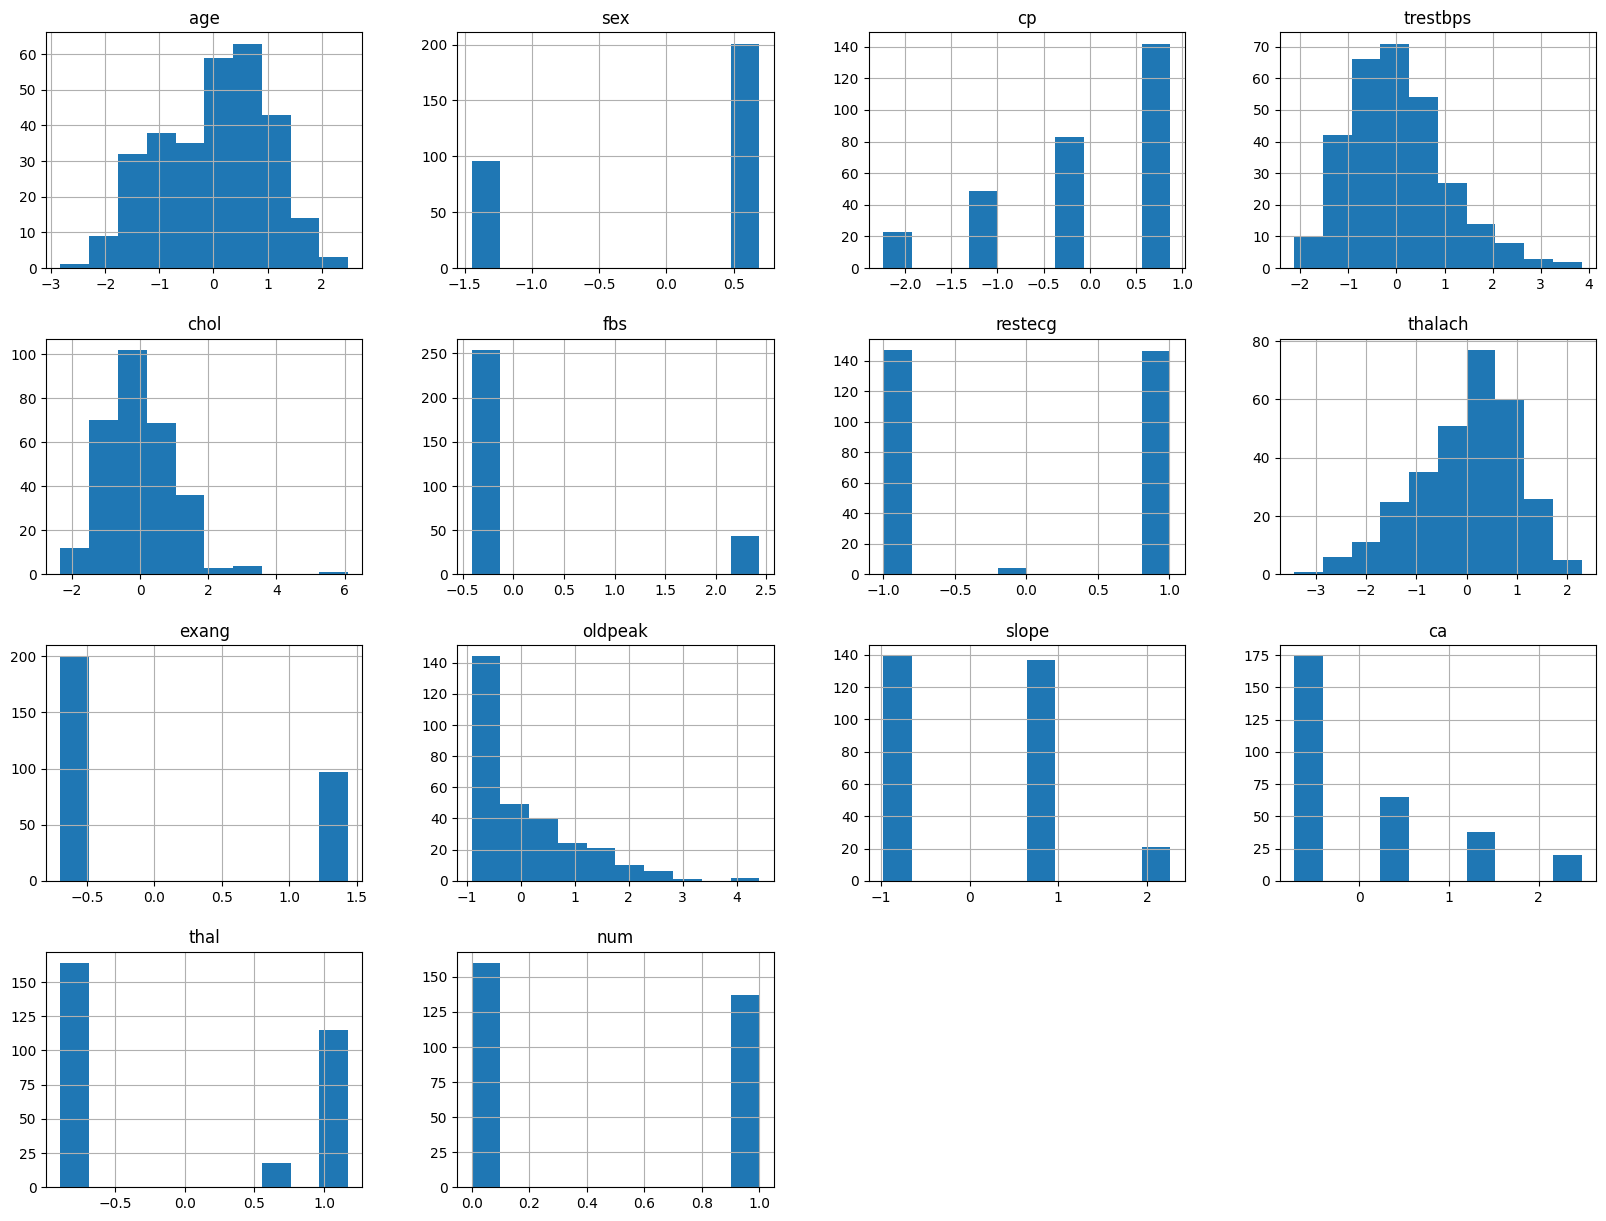

In [16]:
df1.hist(figsize=(20,15),histtype='barstacked')
plt.show()

## target and feature

In [18]:
from sklearn.model_selection import train_test_split
X=df1.drop(columns=['num'])
y=df1['num']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5,shuffle=True)

In [19]:
import copy
X_train_knn = copy.deepcopy(X_train)
X_test_knn = copy.deepcopy(X_test)
y_train_knn = copy.deepcopy(y_train)
y_test_knn = copy.deepcopy(y_test)

X_train_lr = copy.deepcopy(X_train)
X_test_lr = copy.deepcopy(X_test)
y_train_lr = copy.deepcopy(y_train)
y_test_lr = copy.deepcopy(y_test)

# Modeling

## K-Nearest Neighbors (KNN) Classification

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score,recall_score,precision_score
from sklearn.model_selection import cross_val_score
import itertools

### **Hyperparameter Selection (Choosing \( k \))**  
To determine the optimal number of neighbors (`k`), we perform **5-fold cross-validation** for values of \( k \) ranging from 1 to 17. The error rate (1 - accuracy) is plotted against \( k \) to identify the best choice:  

In [21]:
# 计算与样本量相关的阈值或比例（例如确定 kNN 中的 k)

X.shape[0]**0.5

17.233687939614086

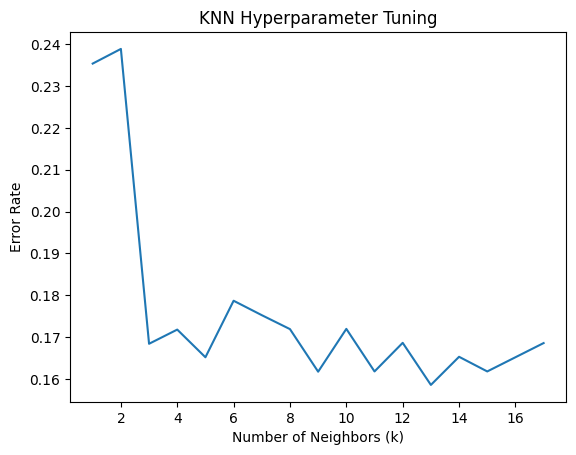

In [22]:
erros=[]
for k in range(1,18):
    knn=KNeighborsClassifier(n_neighbors=k)
    score=cross_val_score(knn,X,y,scoring='accuracy',cv=5).mean()
    erros.append((1-score))
plt.plot(np.arange(1,18),erros)
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Error Rate")
plt.title("KNN Hyperparameter Tuning")
plt.show()

From the plot, we select k=13 as it minimizes the error rate.

### Model Training and Evaluation
The dataset is split into __80% training and 20%__ testing. The selected KNN model is trained on the training set and evaluated on the test set.

In [23]:
knn=KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train_knn,y_train_knn)
y_pred_knn=knn.predict(X_test_knn)

### Metrics Evaluation
#### Confusion Matrix Visualization
To assess model performance, we generate a confusion matrix, which provides insights into classification accuracy and misclassification rates.

In [24]:
def plot_confusion_matrix(cm, target_names, title='Confusion Matrix', cmap=None, normalize=False):
    """
    Parameters:
    cm (np.array): Confusion matrix
    target_names (list): List of class labels (e.g., ['Healthy', 'Diseased'])
    title (str): Title of the plot
    cmap: Colormap (default is Blues)
    normalize (bool): Whether to normalize values as percentages
    """
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "{:0.4f}".format(cm[i, j]) if normalize else "{:,}".format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel(f'Predicted label\nAccuracy={accuracy:.4f}; Misclassification={misclass:.4f}')
    plt.show()


   

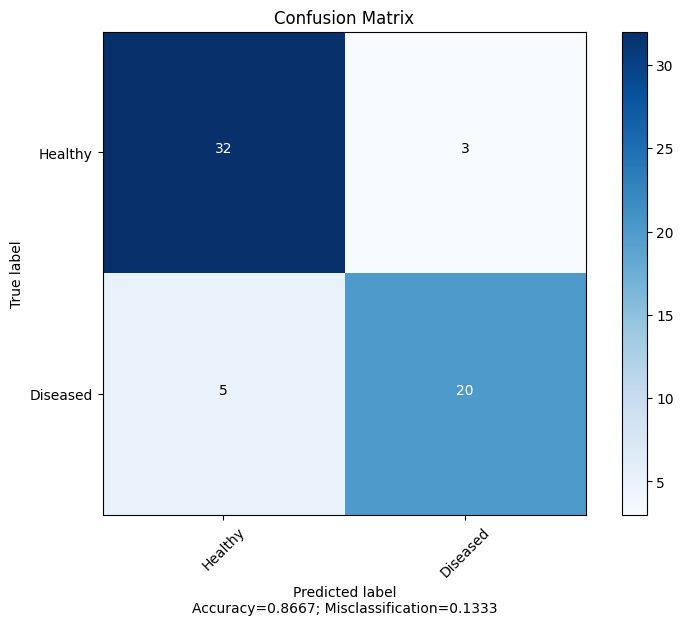

In [25]:
cm = confusion_matrix(y_test_knn, y_pred_knn)
plot_confusion_matrix(cm, target_names=['Healthy', 'Diseased'])


#### Other metrix
1. Accuracy (Quickly reflects the overall prediction capability)
2. Precision (Focus on False Positives: Reduces misdiagnosis and avoids unnecessary interventions.)
3. Recall (Focus on False Negatives: Reduces missed diagnoses and avoids delayed treatment.)
4. F1 score (Balances Precision and Recall)


In [26]:
accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)
print(f"Accuracy: {accuracy:.4f}\n"
      f"Precision: {precision:.4f}\n"
      f"Recall: {recall:.4f}\n"
      f"F1: {f1:.4f}")


Accuracy: 0.8667
Precision: 0.8696
Recall: 0.8000
F1: 0.8333


## logistic

###  Cross-Validation and Test Set Evaluation for Logistic Regression

The model cross-validate process using 5-fold cross-validation on the training set (80% of data) and final evaluation on a held-out test set (20% of data).

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate,cross_val_predict
# from sklearn.metrics import roc_auc_score


### cross val in cv and test in test set

=== Cross-Validation Results (80% Training Data) ===
Average Accuracy: 0.8270
Average Precision: 0.8417
Average Recall: 0.7866
Average F1: 0.8113


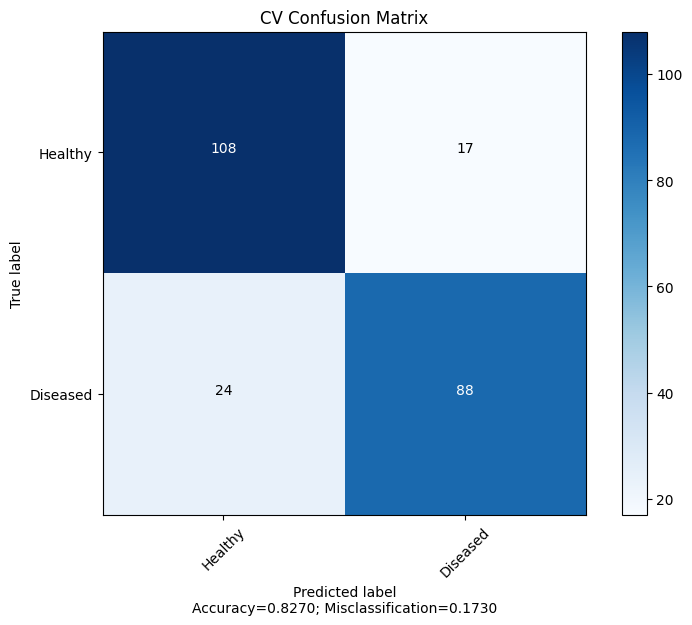


=== Test Set Results (20% Holdout) ===
Test Accuracy: 0.9000
Test Precision: 0.9130
Test Recall: 0.8400
Test F1: 0.8750


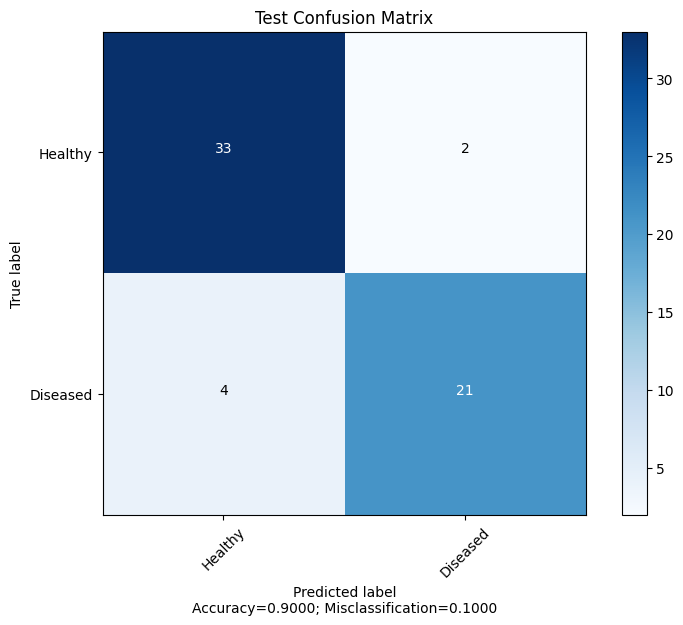

In [ ]:
model = LogisticRegression(random_state=0, solver='lbfgs', max_iter=10000)

print("=== Cross-Validation Results (80% Training Data) ===")
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
cv_results = cross_validate(model, X_train_lr, y_train_lr, cv=5, scoring=scoring)

print(f"Average Accuracy: {np.mean(cv_results['test_accuracy']):.4f}")
print(f"Average Precision: {np.mean(cv_results['test_precision']):.4f}")
print(f"Average Recall: {np.mean(cv_results['test_recall']):.4f}")
print(f"Average F1: {np.mean(cv_results['test_f1']):.4f}")

y_pred_lr = cross_val_predict(model, X_train_lr, y_train_lr, cv=5)
cm_cv = confusion_matrix(y_train_lr, y_pred_lr)
plot_confusion_matrix(cm_cv, ['Healthy', 'Diseased'], 'CV Confusion Matrix')

print("\n=== Test Set Results (20% Holdout) ===")
model.fit(X_train_lr, y_train_lr)  
y_pred_lr = model.predict(X_test_lr)

print(f"Test Accuracy: {accuracy_score(y_test_lr, y_pred_lr):.4f}")
print(f"Test Precision: {precision_score(y_test_lr, y_pred_lr):.4f}")
print(f"Test Recall: {recall_score(y_test_lr, y_pred_lr):.4f}")
print(f"Test F1: {f1_score(y_test_lr, y_pred_lr):.4f}")

cm_test = confusion_matrix(y_test_lr, y_pred_lr)
plot_confusion_matrix(cm_test, ['Healthy', 'Diseased'], 'Test Confusion Matrix')

In [ ]:

model.fit(X, y)
coefficient_list = model.coef_

attributes = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 
              'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

print("\nfeature:")
for i in range(len(attributes)):
    print(f'The coefficient of "{attributes[i]}" is {coefficient_list[0][i]:.4f}')   
print(f'The intercept is {model.intercept_[0]:.4f}')


feature:
The coefficient of "age" is -0.0983
The coefficient of "sex" is 0.5754
The coefficient of "cp" is 0.5362
The coefficient of "trestbps" is 0.3904
The coefficient of "chol" is 0.2350
The coefficient of "fbs" is -0.3246
The coefficient of "restecg" is 0.2370
The coefficient of "thalach" is -0.4492
The coefficient of "exang" is 0.4213
The coefficient of "oldpeak" is 0.3000
The coefficient of "slope" is 0.3229
The coefficient of "ca" is 1.1044
The coefficient of "thal" is 0.6529
The intercept is -0.0798


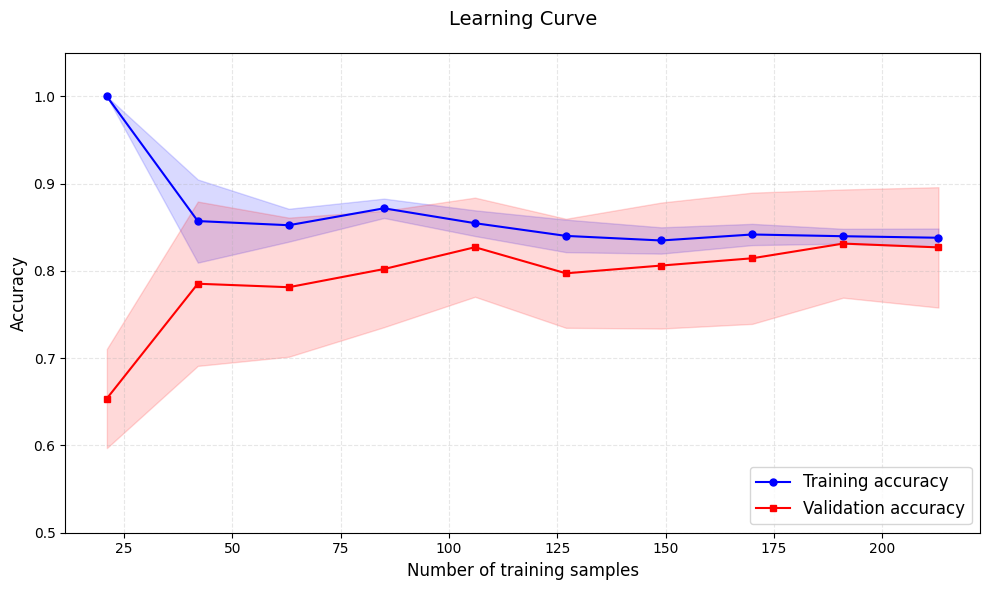

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

pipe_lr3 = make_pipeline(
    StandardScaler(),
    LogisticRegression(random_state=1, penalty='l2', max_iter=10000)
)

# Learning curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator=pipe_lr3,
    X=X_train, 
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=10,
    n_jobs=1
)

# metrix 
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# show learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, 
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, 
         color='red', marker='s', 
         markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='red')


plt.xlabel('Number of training samples', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Learning Curve', fontsize=14, pad=20)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.ylim([0.5, 1.05])  

plt.tight_layout()
plt.show()